Data Science Solutions with Python by Tshepo Chris Nokeri, Apress. 2021

# CHAPTER 7: NEURAL NETWORKS WITH SCIKIT-LEARN, KERAS AND H2O

This chapter executes and appraises a non-linear neural networks for binary classification using a diverse set of comprehensive Python frameworks (i.e., SciKit-Learn, Keras, and H2O).

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set("talk","ticks",font_scale=1, font="Calibri")

# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\i5 lenov\Downloads\banking.csv")
drop_column_names = df.columns[[8, 9, 10]]
initial_data = df.drop(drop_column_names, axis="columns")
initial_data.iloc[::, 1] = pd.get_dummies(initial_data.iloc[::, 1])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 11] = pd.get_dummies(initial_data.iloc[::, 11])
initial_data = initial_data.dropna()
x = np.array(initial_data.iloc[::,0:17])
y = np.array(initial_data.iloc[::,-1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

# SciKit-Learn in Action

In [3]:
from sklearn.neural_network import MLPClassifier
sk_multilayer_perceptron_net = MLPClassifier()
sk_multilayer_perceptron_net.fit(sk_standard_scaled_x_train, y_train)

MLPClassifier()

In [4]:
from sklearn import metrics
sk_yhat_multilayer_perceptron_net = sk_multilayer_perceptron_net.predict(sk_standard_scaled_x_test)
sk_multilayer_perceptron_net_assessment = pd.DataFrame(metrics.classification_report(y_test, sk_yhat_multilayer_perceptron_net,
                                                                                     output_dict=True)).transpose()
sk_multilayer_perceptron_net_assessment

,precision,recall,f1-score,support
0,0.917062,0.976655,0.945921,7325.000000
1,0.608696,0.291347,0.394074,913.000000
accuracy,0.900704,0.900704,0.900704,0.900704
macro avg,0.762879,0.634001,0.669998,8238.000000
weighted avg,0.882886,0.900704,0.884761,8238.000000


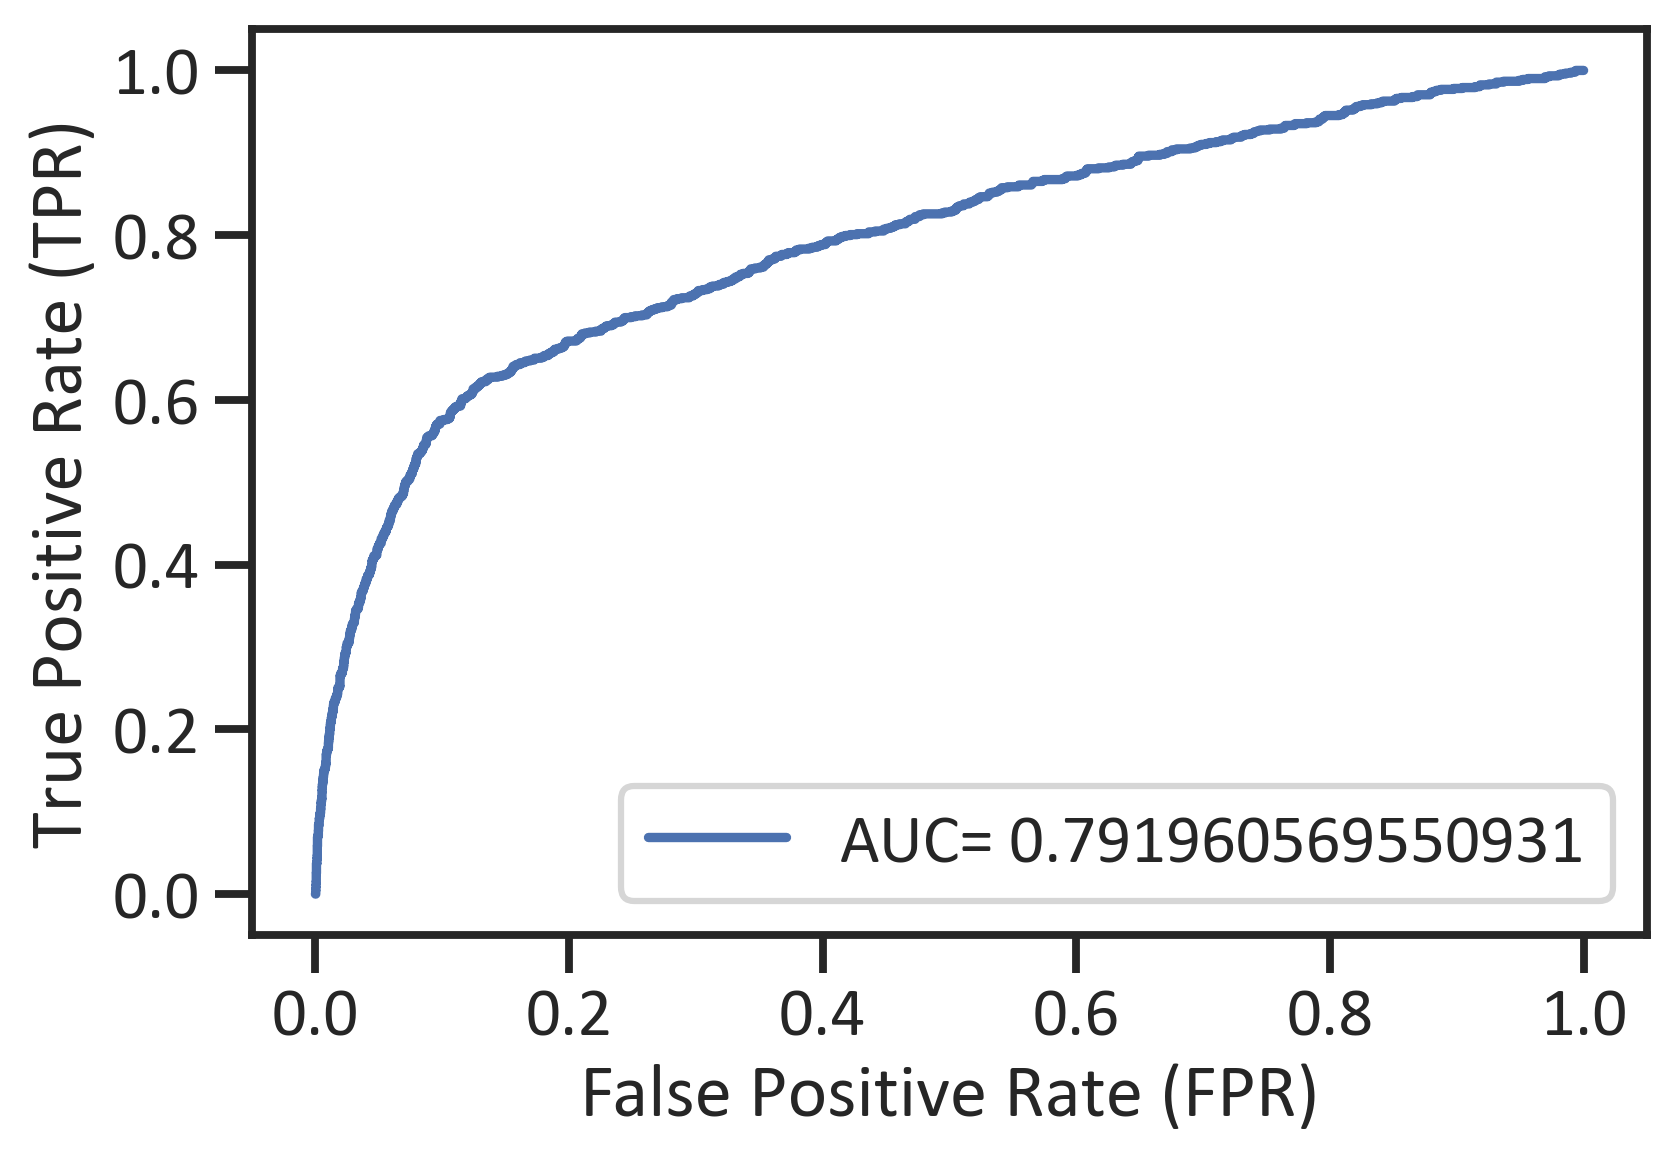

In [5]:
yhat_proba_sk_multilayer_perceptron_net = sk_multilayer_perceptron_net.predict_proba(sk_standard_scaled_x_test)[::,1]
fpr_sk_multilayer_perceptron_net, tprr_sk_multilayer_perceptron_net, _ = metrics.roc_curve(y_test, yhat_proba_sk_multilayer_perceptron_net)
area_under_curve_sk_multilayer_perceptron_net = metrics.roc_auc_score(y_test, yhat_proba_sk_multilayer_perceptron_net)
plt.plot(fpr_sk_multilayer_perceptron_net, tprr_sk_multilayer_perceptron_net, label="AUC= "+ str(area_under_curve_sk_multilayer_perceptron_net))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

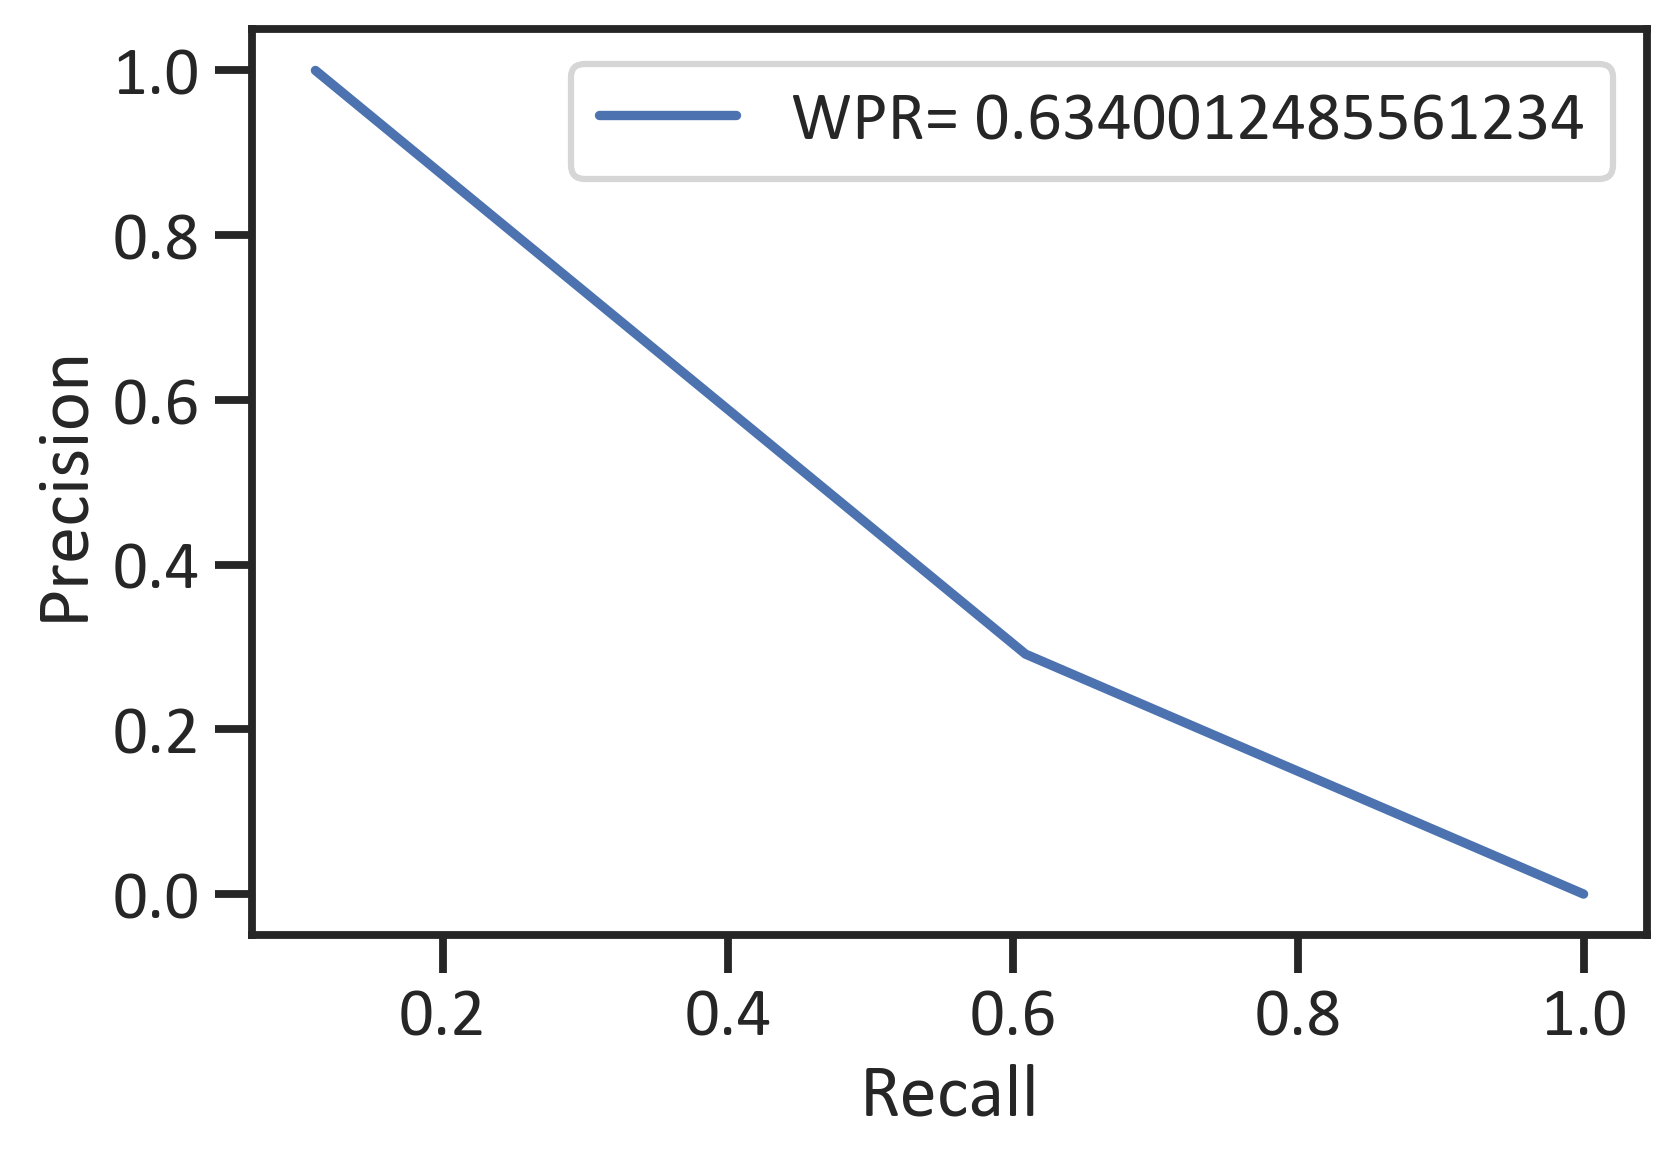

In [6]:
p_sk_multilayer_perceptron_net, r_sk_multilayer_perceptron_net, _ = metrics.precision_recall_curve(y_test, sk_yhat_multilayer_perceptron_net)
weighted_ps_sk_multilayer_perceptron_net = metrics.roc_auc_score(y_test, sk_yhat_multilayer_perceptron_net)
plt.plot(p_sk_multilayer_perceptron_net, r_sk_multilayer_perceptron_net,
         label="WPR= " +str(weighted_ps_sk_multilayer_perceptron_net))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

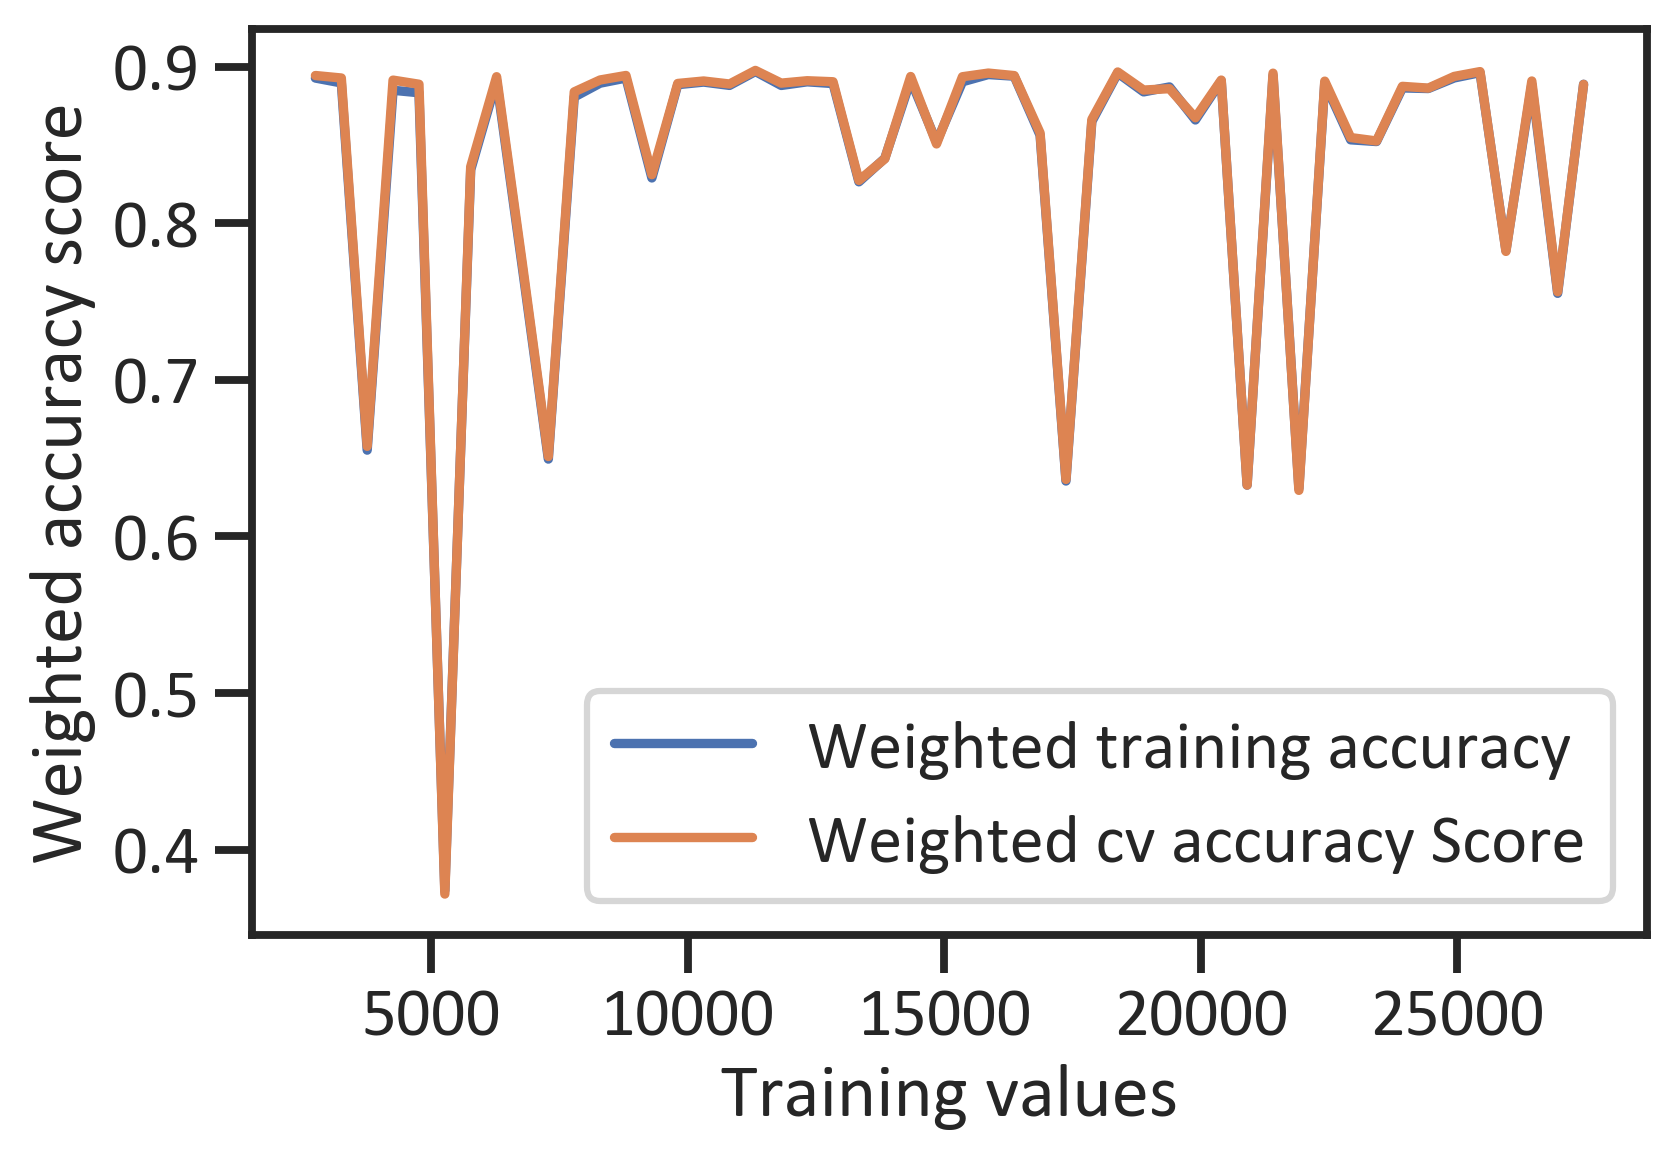

In [7]:
from sklearn.model_selection import learning_curve
train_port_sk_multilayer_perceptron_net, trainscore_sk_multilayer_perceptron_net, testscore_sk_multilayer_perceptron_net = learning_curve(sk_multilayer_perceptron_net, x, y,
                                                                                                                                        cv=3, n_jobs=-5, train_sizes=np.linspace(0.1,1.0,50))
trainscoresk_multilayer_perceptron_net_mean = np.mean(trainscore_sk_multilayer_perceptron_net, axis=1)
testscoresk_multilayer_perceptron_net_mean = np.mean(testscore_sk_multilayer_perceptron_net, axis=1)
plt.plot(train_port_sk_multilayer_perceptron_net, trainscoresk_multilayer_perceptron_net_mean, label="Weighted training accuracy")
plt.plot(train_port_sk_multilayer_perceptron_net, testscoresk_multilayer_perceptron_net_mean, label="Weighted cv accuracy Score")
plt.xlabel("Training values")
plt.ylabel("Weighted accuracy score")
plt.legend(loc="best")
plt.show()

# Keras in Action

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

In [9]:
import tensorflow as tf
from  tensorflow.keras import Sequential, regularizers
from  tensorflow.keras.layers import Dense, Dropout
from  tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [10]:
def keras_multilayer_perceptron_net(optimizer="adam"):
    keras_multilayer_perceptron_net_model = Sequential()
    keras_multilayer_perceptron_net_model.add(Dense(17, input_dim=17, activation="sigmoid",kernel_regularizer=regularizers.l1(0.001), bias_regularizer=regularizers.l1(0.01)))
    keras_multilayer_perceptron_net_model.add(Dense(17, activation="relu"))
    keras_multilayer_perceptron_net_model.add(Dense(17, activation="relu"))
    keras_multilayer_perceptron_net_model.add(Dense(1, activation="relu"))
    keras_multilayer_perceptron_net_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return keras_multilayer_perceptron_net_model

In [11]:
keras_multilayer_perceptron_net_model = KerasClassifier(build_fn=keras_multilayer_perceptron_net)

In [12]:
keras_multilayer_perceptron_net_model_history = keras_multilayer_perceptron_net_model.fit(sk_standard_scaled_x_train, y_train, validation_data=(x_val,y_val), batch_size=14, epochs=56)
keras_multilayer_perceptron_net_model_history

Epoch 1/56
1883/1883 [==============================] - 3s 2ms/step - loss: 0.5473 - accuracy: 0.8915 - val_loss: 0.4778 - val_accuracy: 0.8891
Epoch 2/56
1883/1883 [==============================] - 3s 2ms/step - loss: 0.3556 - accuracy: 0.8961 - val_loss: 0.3931 - val_accuracy: 0.8891
Epoch 3/56
1883/1883 [==============================] - 3s 1ms/step - loss: 0.3319 - accuracy: 0.8969 - val_loss: 0.4406 - val_accuracy: 0.8891
Epoch 4/56
1883/1883 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8964 - val_loss: 0.4455 - val_accuracy: 0.8891
Epoch 5/56
1883/1883 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.8967 - val_loss: 1.6833 - val_accuracy: 0.8891
Epoch 6/56
1883/1883 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8966 - val_loss: 0.5410 - val_accuracy: 0.8891
Epoch 7/56
1883/1883 [==============================] - 3s 1ms/step - loss: 0.2987 - accuracy: 0.8965 - val_loss: 0.6815 - val_accuracy:

## Model Evaluation

In [13]:
keras_yhat_multilayer_perceptron_net = keras_multilayer_perceptron_net_model.predict(sk_standard_scaled_x_test)
keras_multilayer_perceptron_net_model = pd.DataFrame(metrics.classification_report(y_test, keras_yhat_multilayer_perceptron_net,
                                                                                   output_dict=True)).transpose()
keras_multilayer_perceptron_net_model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,precision,recall,f1-score,support
0,0.908443,0.991536,0.948172,7325.000000
1,0.744856,0.198248,0.313149,913.000000
accuracy,0.903617,0.903617,0.903617,0.903617
macro avg,0.826649,0.594892,0.630661,8238.000000
weighted avg,0.890313,0.903617,0.877794,8238.000000


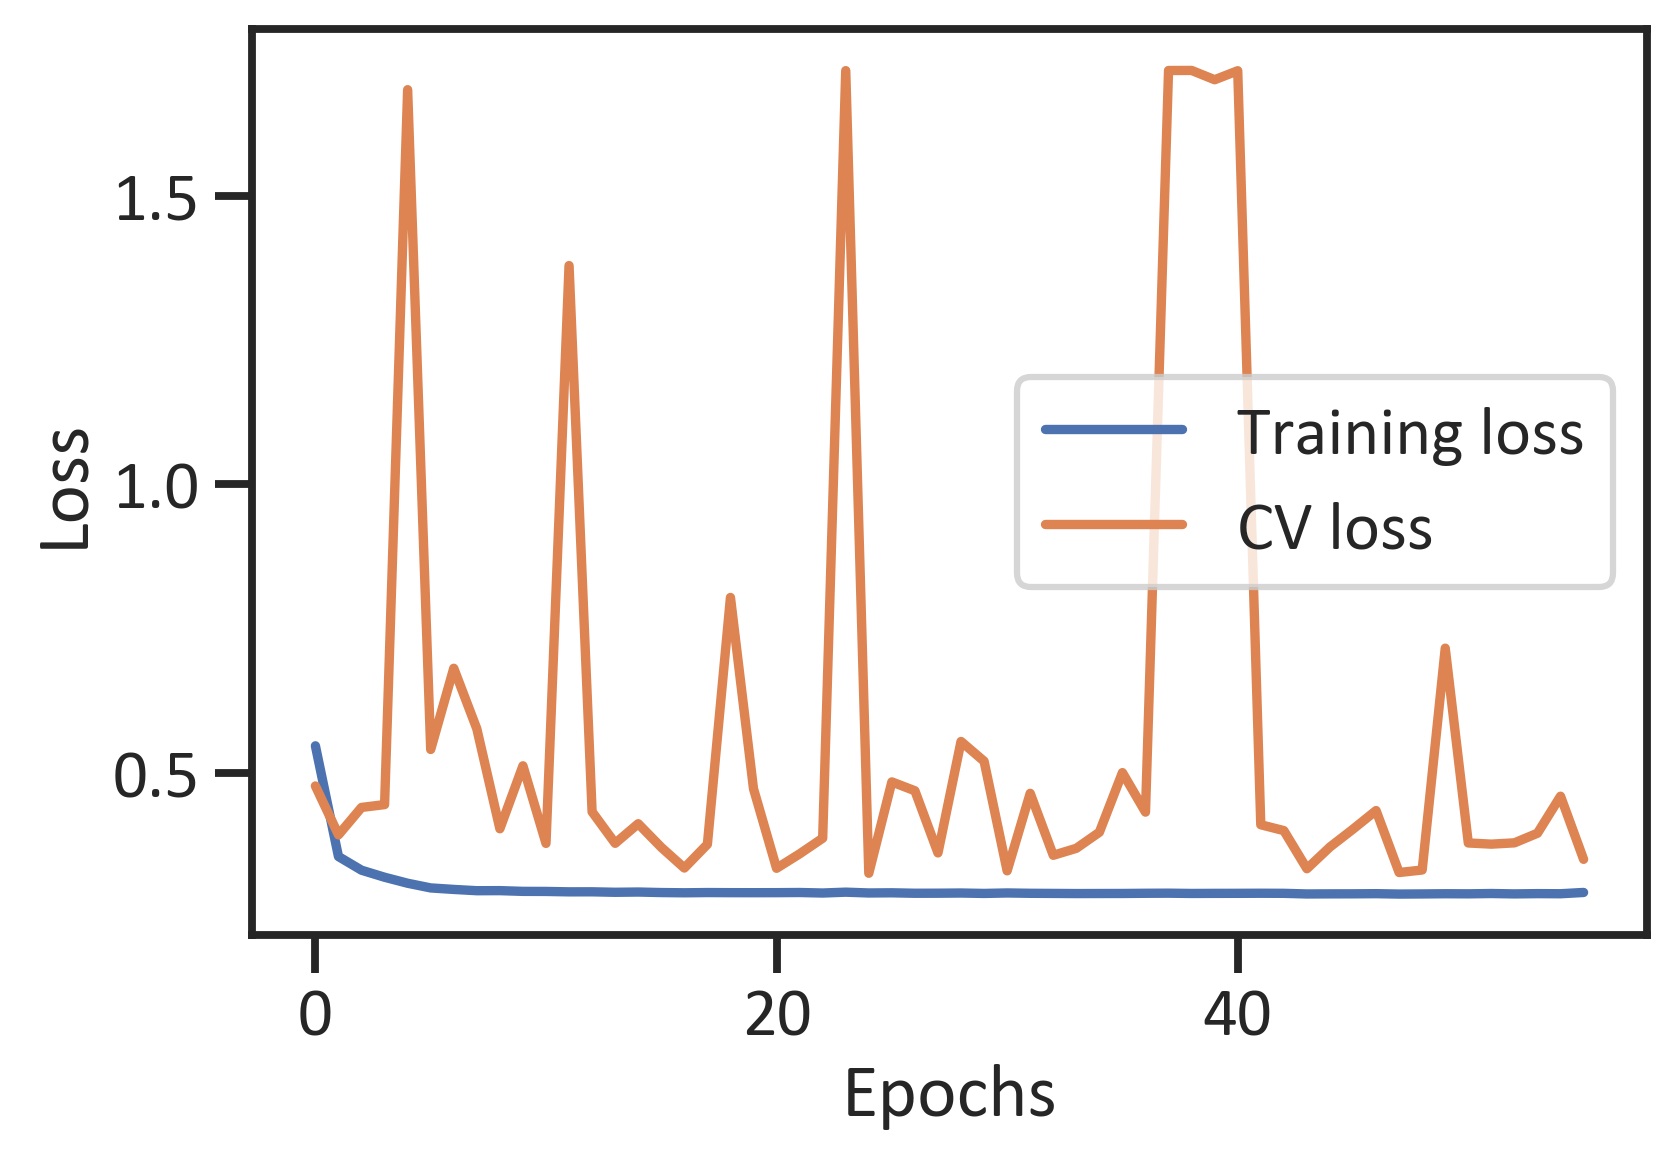

In [14]:
plt.plot(keras_multilayer_perceptron_net_model_history.history["loss"], label="Training loss")
plt.plot(keras_multilayer_perceptron_net_model_history.history["val_loss"], label="CV loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

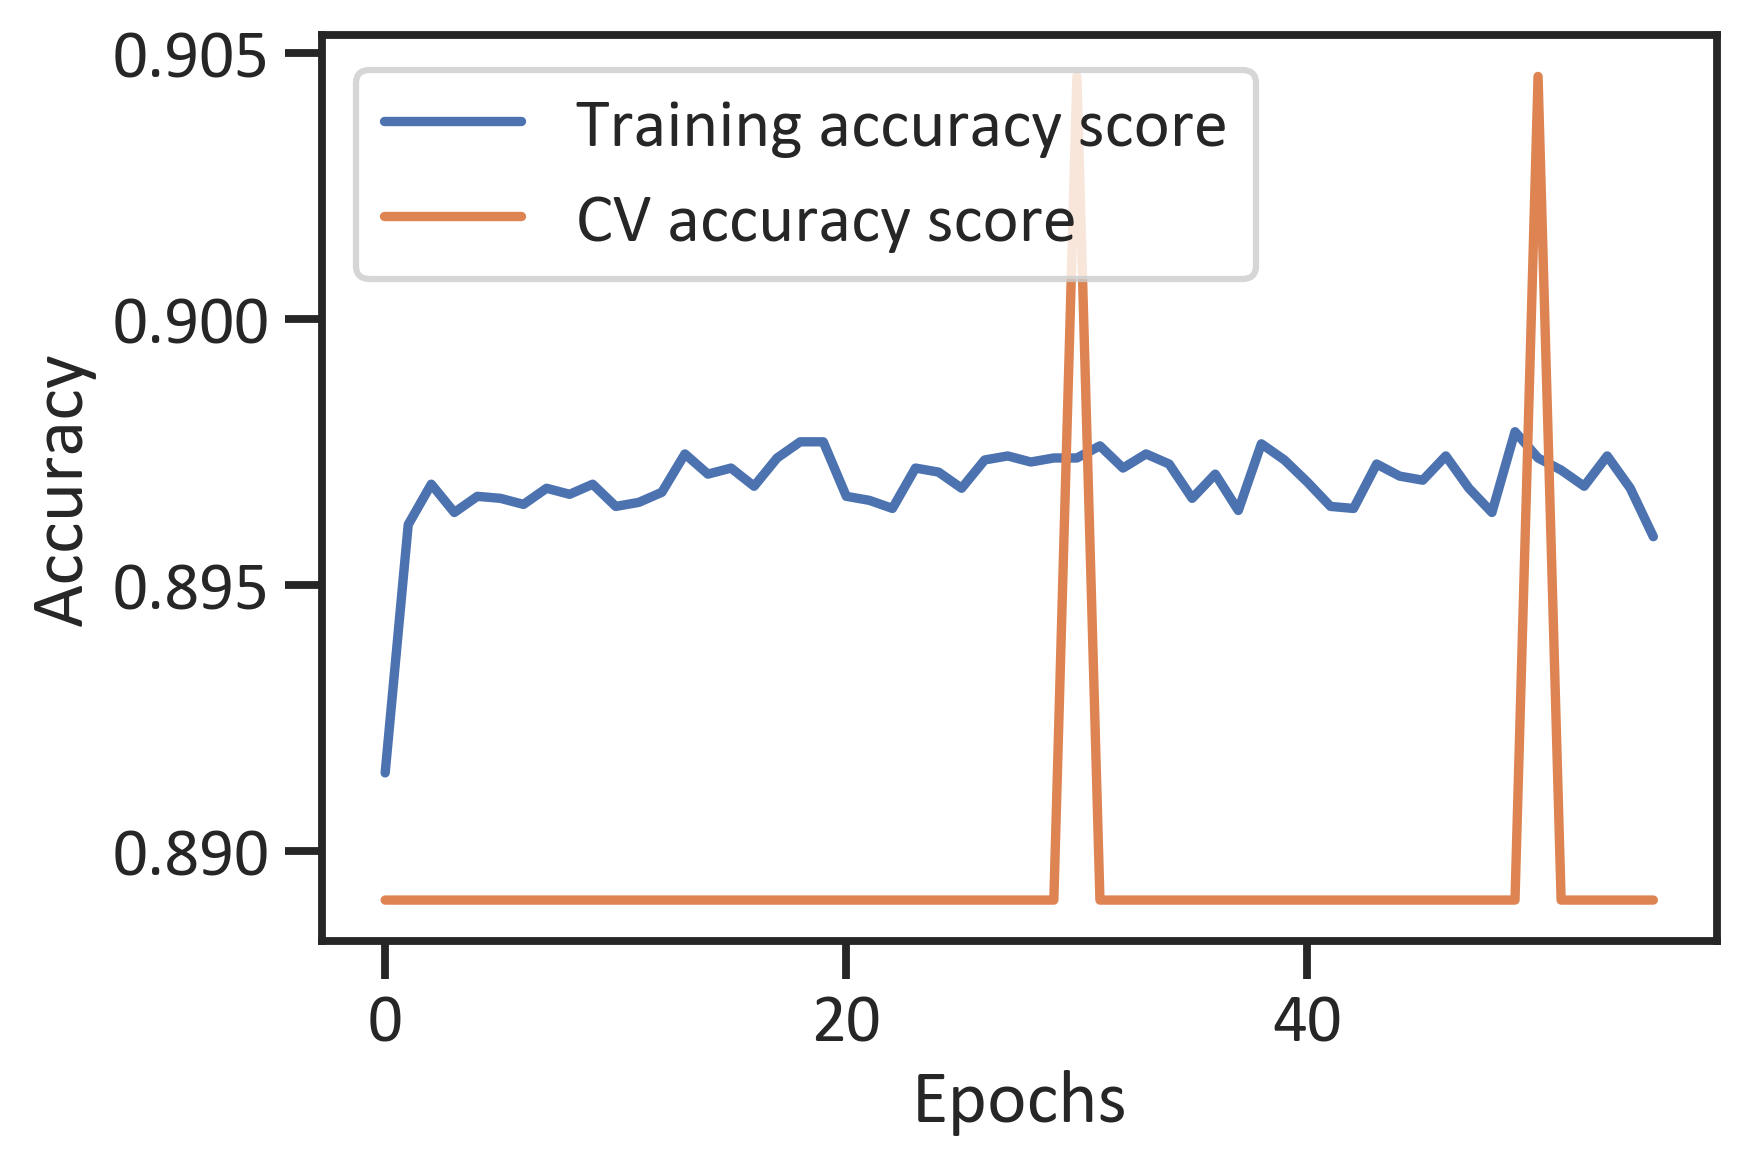

In [15]:
plt.plot(keras_multilayer_perceptron_net_model_history.history["accuracy"], label="Training accuracy score")
plt.plot(keras_multilayer_perceptron_net_model_history.history["val_accuracy"], label="CV accuracy score")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# H2O in Action

In [16]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,29 mins 43 secs
H2O_cluster_timezone:,Africa/Harare
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"1 year, 1 month and 1 day !!!"
H2O_cluster_name:,H2O_from_python_i5_lenov_bqg0yh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.973 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [17]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
y = y_list
x = h2o_data.col_names
x.remove(y_list)

In [19]:
h2o_training_data, h2o_validation_data, h2o_test_data = h2o_data.split_frame(ratios=[.8,.1])

In [20]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o_deep_belief_net = H2ODeepLearningEstimator(hidden=[5], epochs=56)
h2o_deep_belief_net.train(x= x, y= y,training_frame = h2o_training_data, validation_frame = h2o_validation_data)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
